In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from wordcloud import WordCloud

In [2]:
#워드클라우드에 쓸 데이터 불러오기
data = pd.read_csv("장애인시설현황.csv" , encoding = 'euc-kr')

In [3]:
#데이터에서 워드클라우드 제작에 필요한 상세사항 text만 data1에 저장
data1 = data.iloc[:,3:]

In [4]:
#한글패치
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
import warnings
warnings.filterwarnings('ignore')

In [5]:
#data1 테이블에 있는 모든 텍스트를 data1['text']에 합치고 , '해당없음'은 필요가 없으니 제거하는 작업 수행
data1['text'] = data['상세 내용1\n(선택 입력)'] + ' ' + data['상세 내용2\n(선택 입력)'] + ' ' + data['상세 내용3\n(선택 입력)'] + ' ' + data['상세 내용4\n(선택 입력)'] + ' ' + data['상세 내용5\n(선택 입력)']
data1 = data1.applymap(lambda x: x.replace('해당없음', '') if isinstance(x, str) else x)
#isinstance(x,str) : x의 type가 str인지 검사하는 함수

In [6]:
#이미지를 불러오기 위해 패키지 불러오기
from PIL import Image

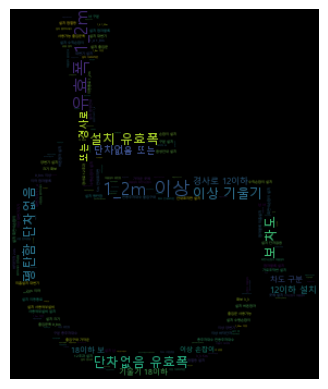

In [7]:
#워드클라우드 구현하기.
text = " ".join(data1['text']) # 합쳐진 단어가 있을 수 있으므로 공백으로 구분.
text = text.replace('.', '_') # 구현 시 .(마침표)는 나오지 않음 . 그러므로 _로 바꿔서 출력
mask = np.array(Image.open('chair.jpeg')) # 휠체어의 이미지 가져와서 이 이미지의 검정색 부분에만 출력되게 함.
wordcloud = WordCloud(min_font_size = 1 , background_color='black', font_path = path , mask=mask).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()